In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = pd.read_csv('./Podatki/pn2019.csv', delimiter=';', encoding='mbcs')

In [4]:
upravne_enote=data.UpravnaEnotaStoritve.unique()
upravne_enote = upravne_enote[:-1]

In [5]:
month=data.DatumPN.str.split(".").str[1].astype('int')
data['month']=month

In [6]:
#data_by_month usebuje podatke razdeljene po mesecih od 1 - 12 
data_by_month=[]
for i in range(12):
    data_by_month.append(data[data.month==i+1])

In [16]:
regije=["obalno_kraška","goriška","gorenjska","osrednjeslovenska","primorsko_notranjska","juhovzhodna","zasavska","savinjska","posavska","koroška","podravska","pomurska"]
regije_dict = dict()
regije_dict['obalno_kraška']=['IZOLA','KOPER','PIRAN','SEŽANA'] 
regije_dict['goriška']=['AJDOVŠÈINA','IDRIJA','NOVA GORICA','TOLMIN']
regije_dict['gorenjska']=['JESENICE','KRANJ','RADOVLJICA','TRŽIÈ','ŠKOFJA LOKA',]
regije_dict['osrednjeslovenska']=['LJUBLJANA','DOMŽALE','GROSUPLJE','KAMNIK','LOGATEC','VRHNIKA']
regije_dict['primorsko_notranjska']=['CERKNICA','ILIRSKA BISTRICA','POSTOJNA']
regije_dict['juhovzhodna']=['ÈRNOMELJ','KOÈEVJE','METLIKA','NOVO MESTO','RIBNICA','TREBNJE']
regije_dict['zasavska']=['HRASTNIK','TRBOVLJE','LITIJA','ZAGORJE OB SAVI']
regije_dict['savinjska']=['CELJE','LAŠKO','MOZIRJE','SLOVENSKE KONJICE','ŠENTJUR PRI CELJU','ŠMARJE PRI JELŠAH','VELENJE','ŽALEC']
regije_dict['posavska']=['BREŽICE','KRŠKO','SEVNICA']
regije_dict['koroška']=['SLOVENJ GRADEC','DRAVOGRAD','RAVNE NA KOROŠKEM','RADLJE OB DRAVI']
regije_dict['podravska']=['LENART','MARIBOR','ORMOŽ','PESNICA','PTUJ','RUŠE','SLOVENSKA BISTRICA',]
regije_dict['pomurska']=['GORNJA RADGONA','LENDAVA','LJUTOMER','MURSKA SOBOTA',]

graf št nesreč glede na regijo skozi mesece

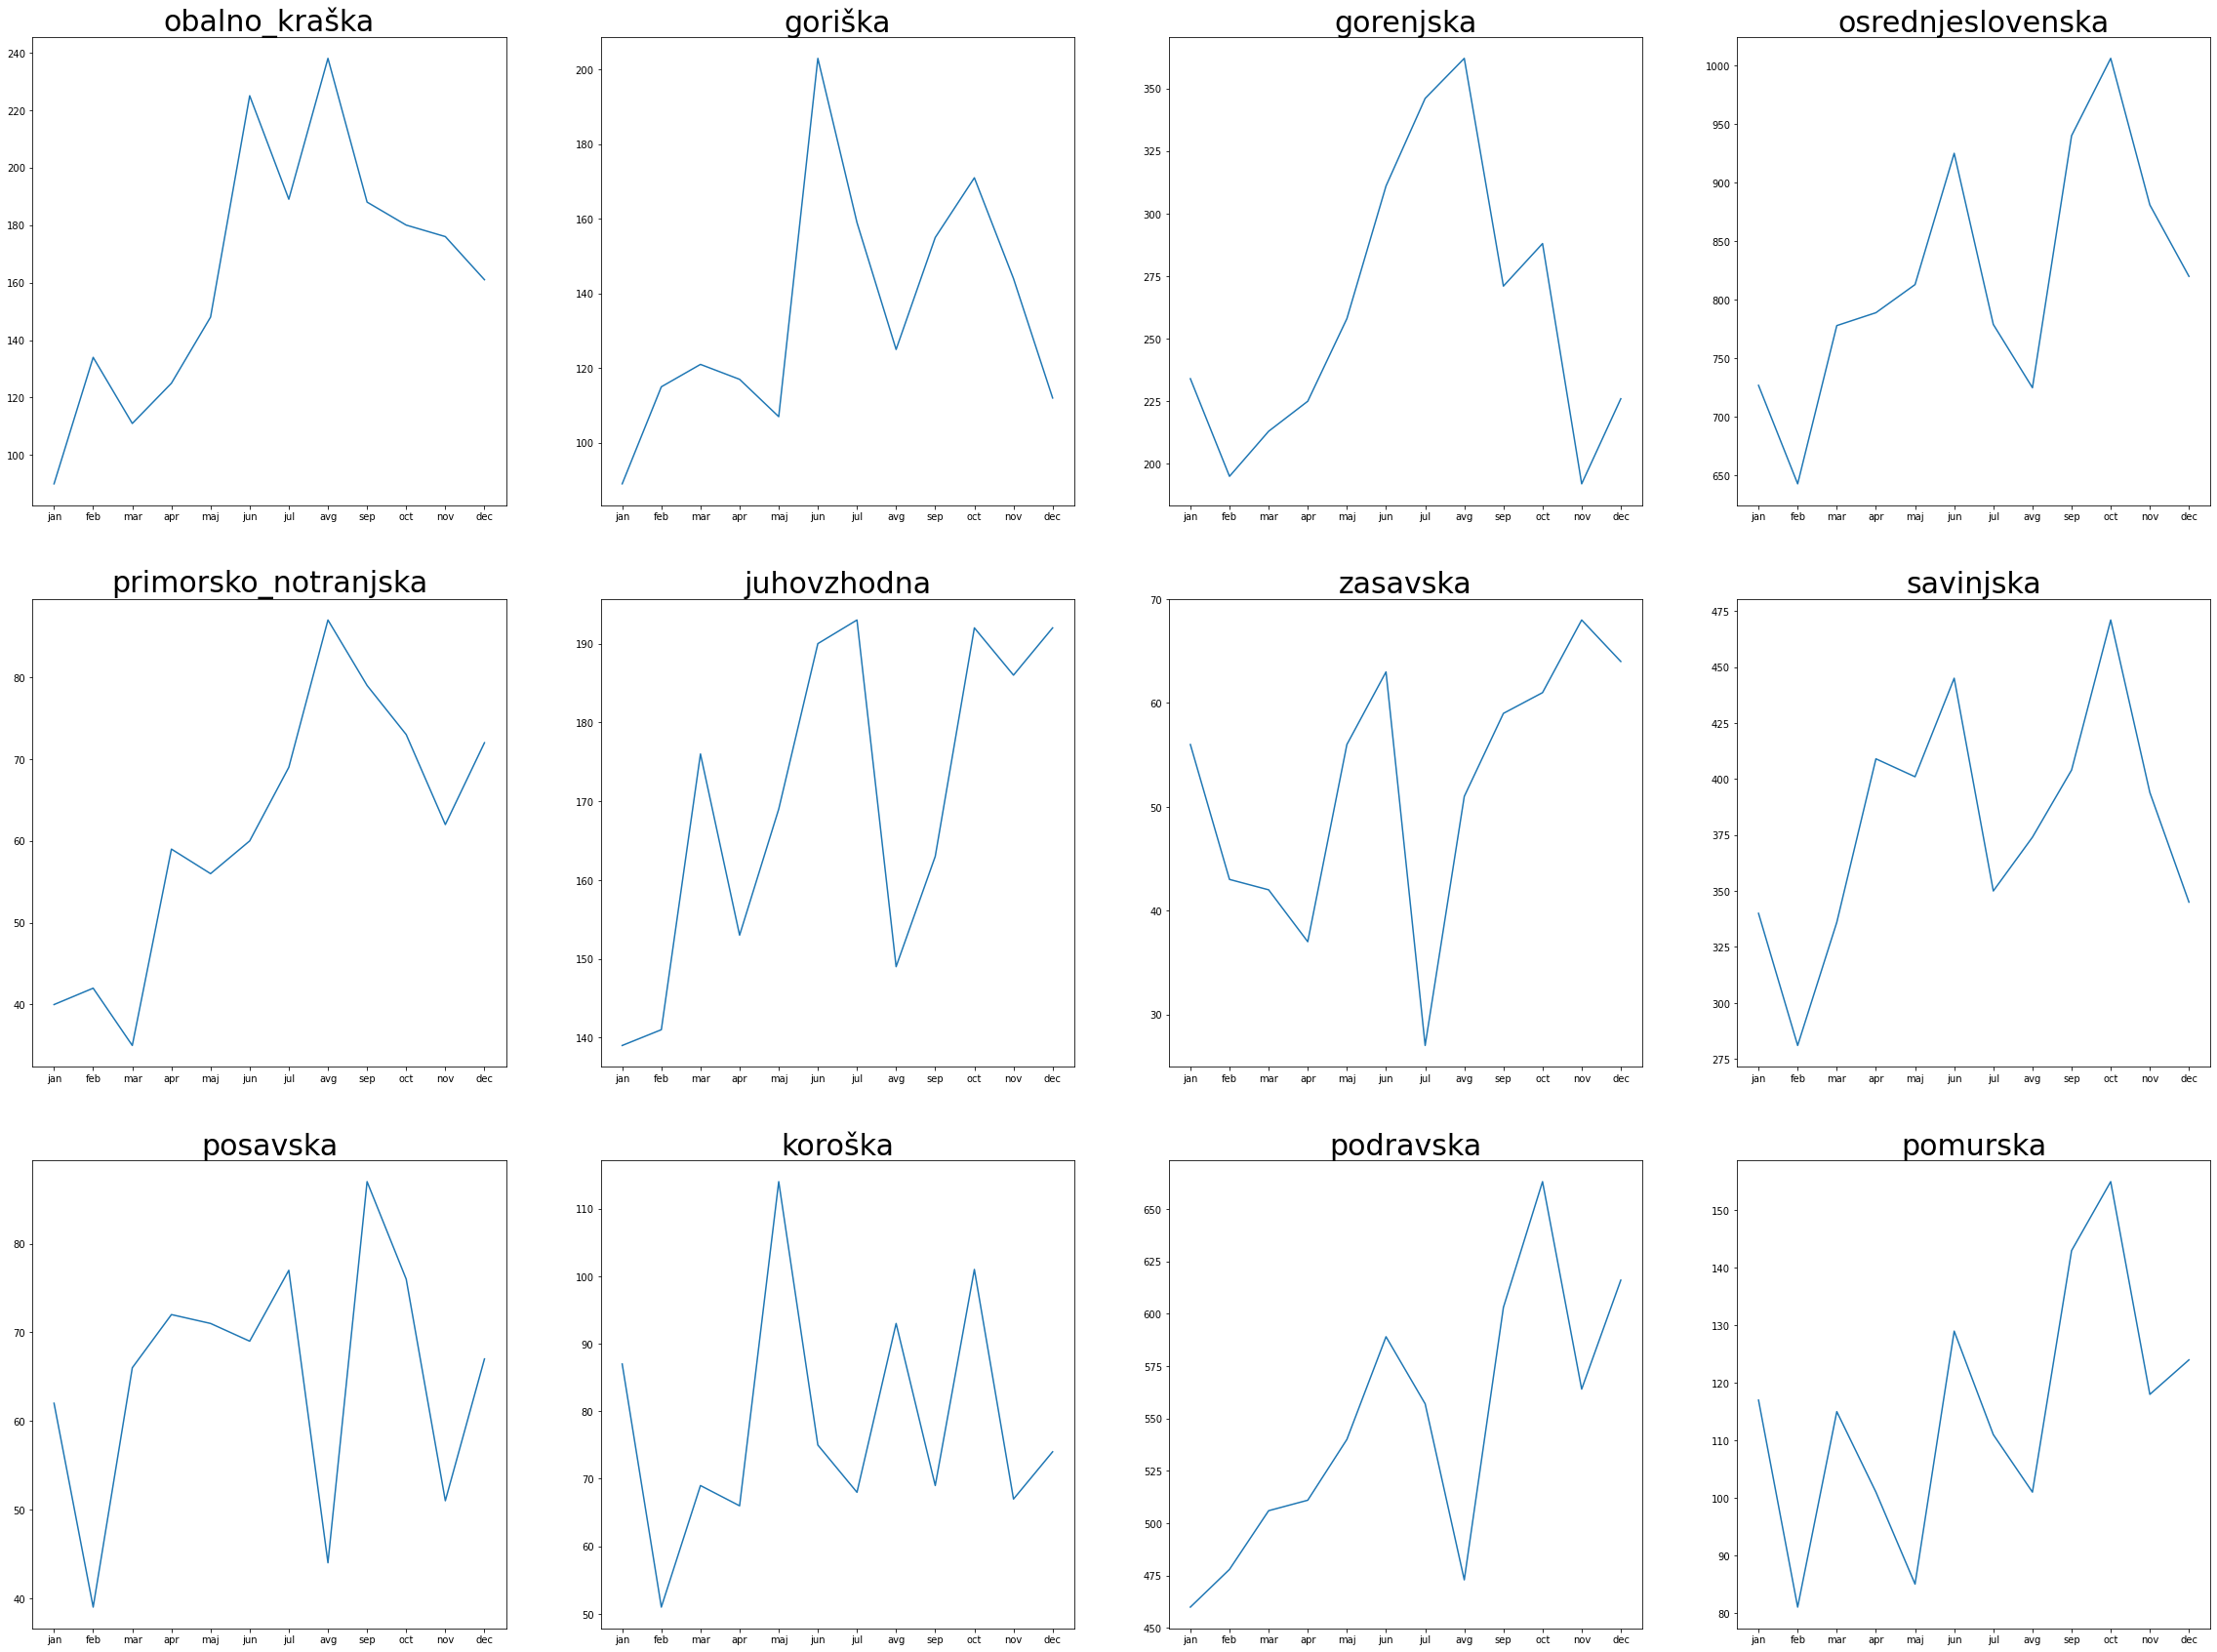

In [62]:
tmp=[]
months=["jan","feb","mar","apr","maj","jun","jul","avg","sep","oct","nov","dec"]
figure, axis = plt.subplots(3,4,figsize=(40,30))
for i, regija in enumerate(regije):
    j=0
    for month in data_by_month:
        tmp.append(month[month.UpravnaEnotaStoritve.isin(regije_dict[regija])].shape[0])
    if i>=4:
        j=1
    if i>=8:
        j=2
    axis[j,i%4].plot(months,tmp,label=regija)
    axis[j,i%4].set_title(regija,fontsize=30)
    tmp=[]
plt.show()

grafi % hude/smrtnih nesreč glede na regijo skozi mesece

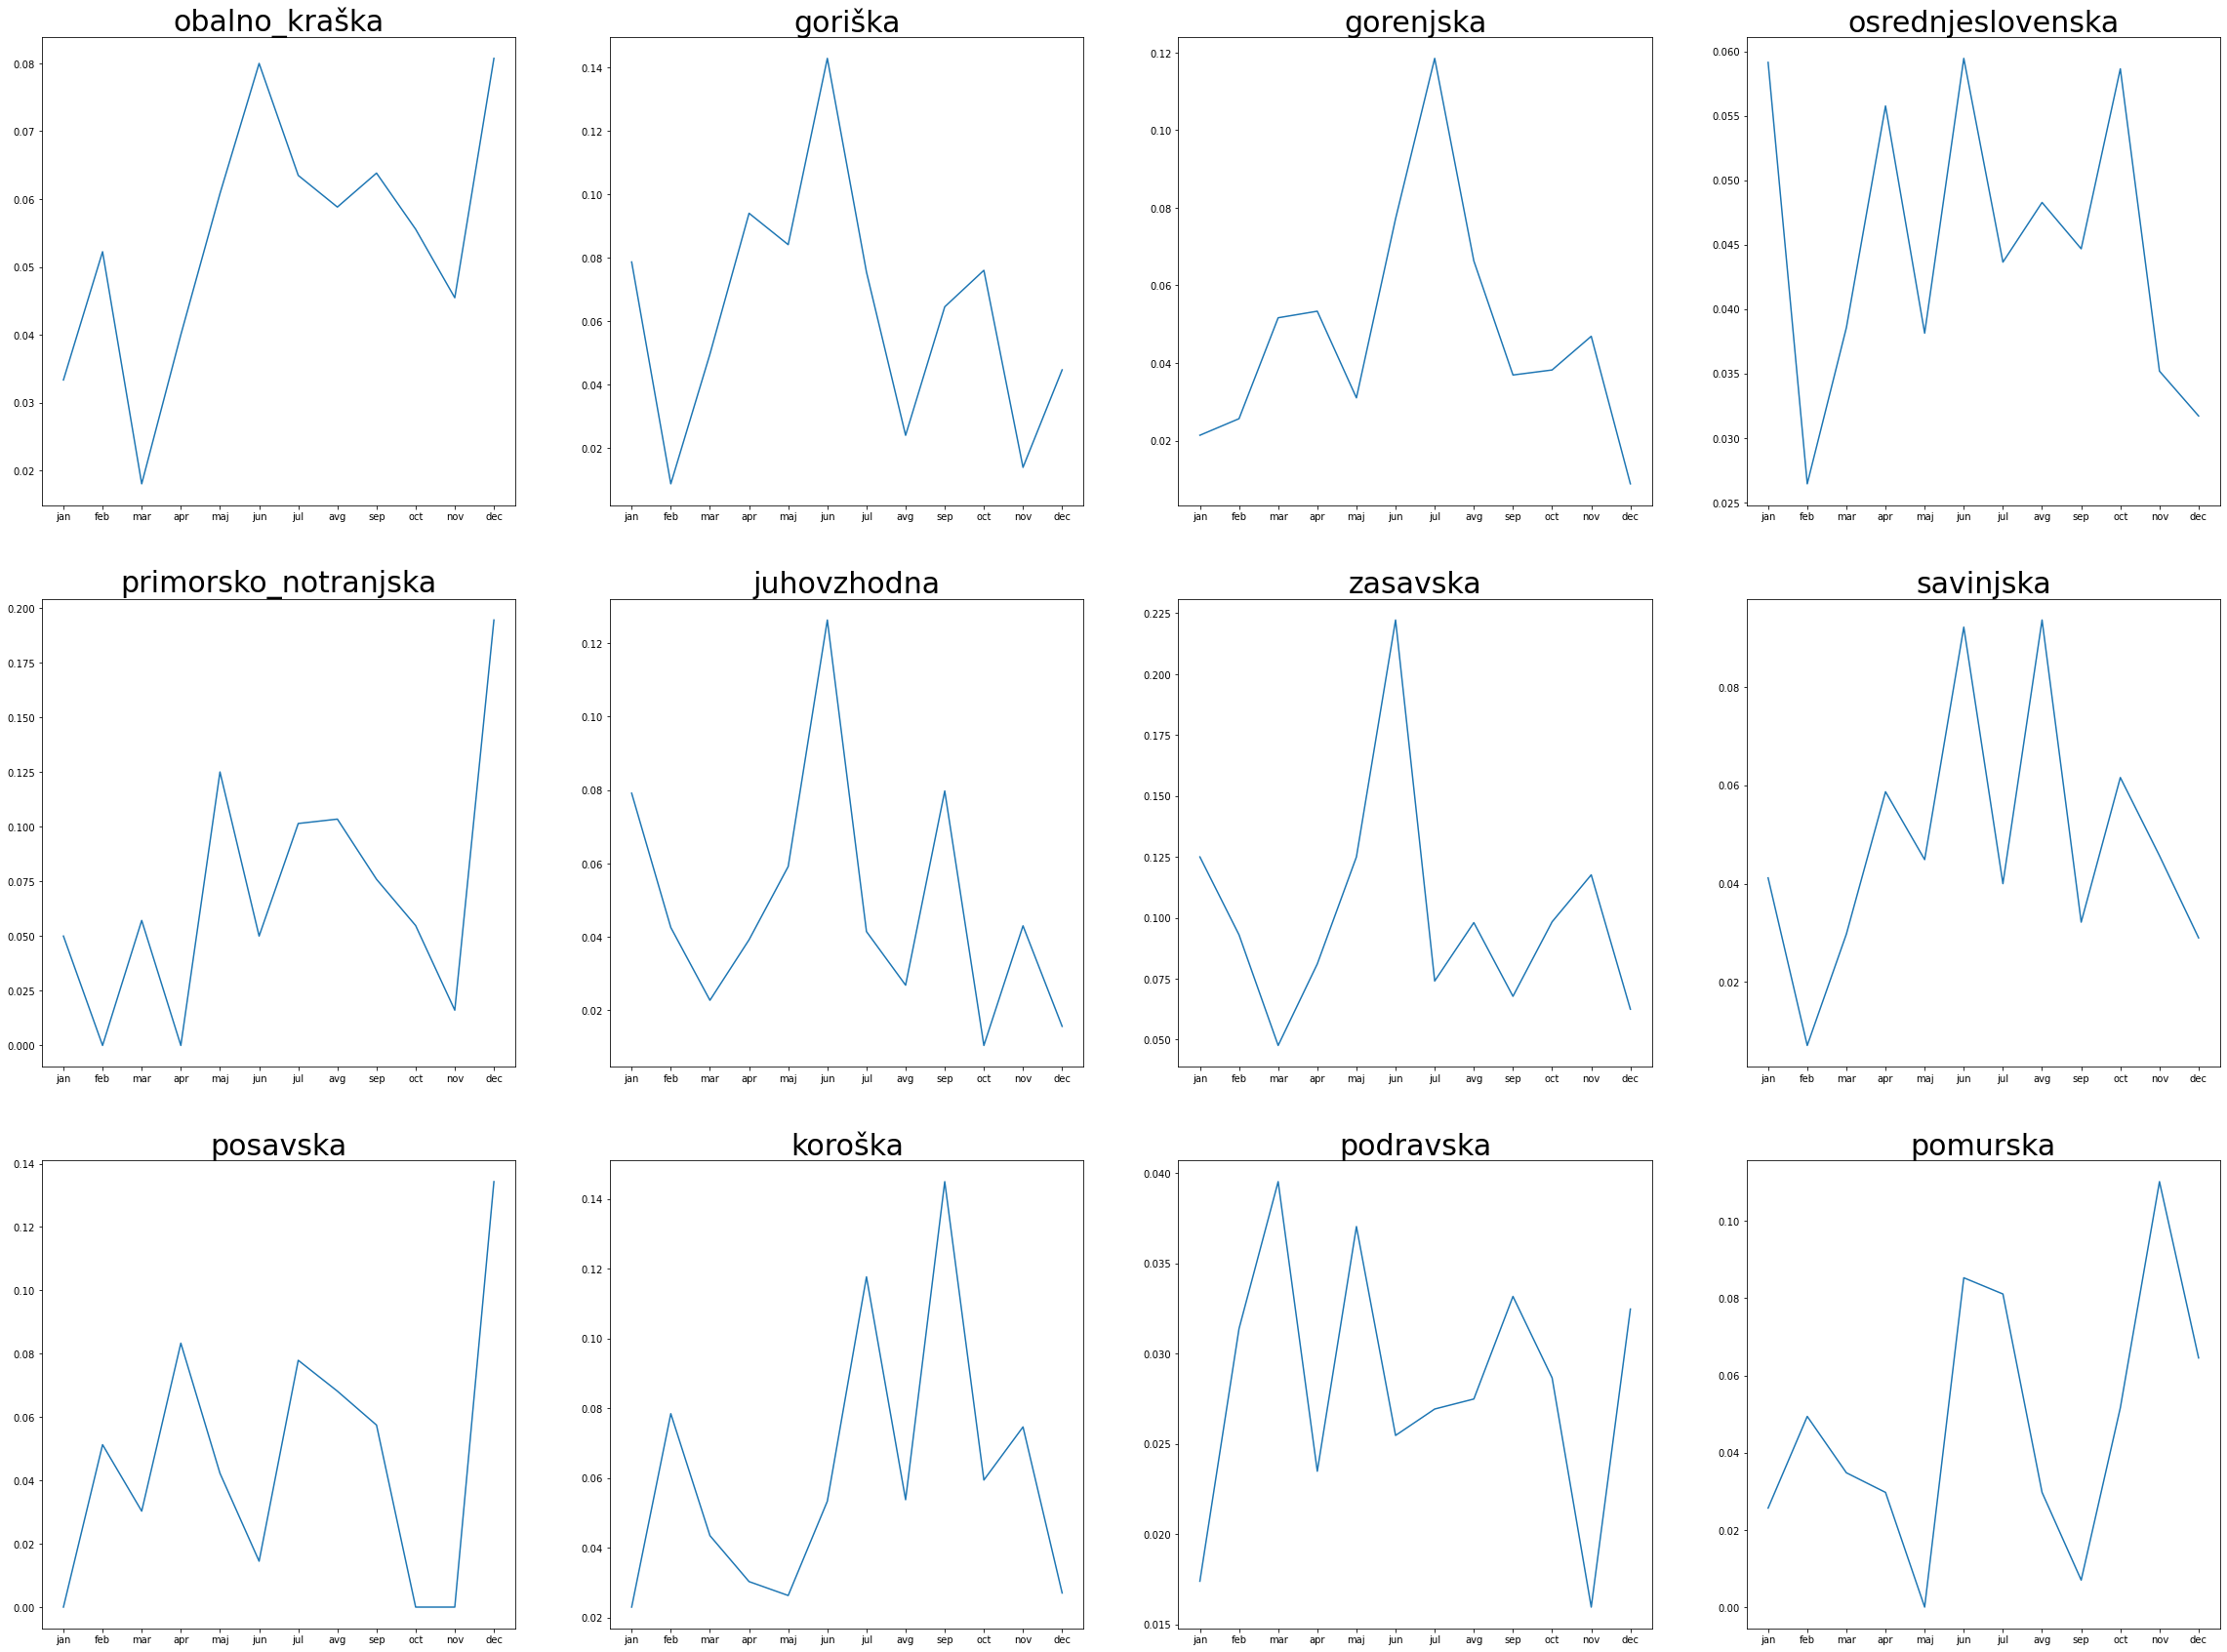

In [64]:
tmp=[]
months=["jan","feb","mar","apr","maj","jun","jul","avg","sep","oct","nov","dec"]
figure, axis = plt.subplots(3,4,figsize=(40,30))
for i, regija in enumerate(regije):
    j=0
    for month in data_by_month:
        tmp.append(month[(month.UpravnaEnotaStoritve.isin(regije_dict[regija]))&((month.KlasifikacijaNesrece=='S HUDO TELESNO POŠKODBO')|(month.KlasifikacijaNesrece=='S SMRTNIM IZIDOM'))].shape[0]/month[month.UpravnaEnotaStoritve.isin(regije_dict[regija])].shape[0])
    if i>=4:
        j=1
    if i>=8:
        j=2
    axis[j,i%4].plot(months,tmp,label=regija)
    axis[j,i%4].set_title(regija,fontsize=30)
    tmp=[]
plt.show()

In [67]:
mean_of_all_max_month_means = []
max_mean_by_month = []
for regija in regije:
    for month in data_by_month:
        tmp.append(month[(month.UpravnaEnotaStoritve.isin(regije_dict[regija]))&((month.KlasifikacijaNesrece=='S HUDO TELESNO POŠKODBO')|(month.KlasifikacijaNesrece=='S SMRTNIM IZIDOM'))].shape[0]/month[month.UpravnaEnotaStoritve.isin(regije_dict[regija])].shape[0])
    max_mean_by_month.append((np.max(tmp),regija))
    mean_of_all_max_month_means.append(np.max(tmp))
    tmp=[]
mean_of_all_max_month_means =np.mean(mean_of_all_max_month_means)
print("mean of the worst monthly regions over the year: \n" + str(mean_of_all_max_month_means))
print("---------------------------------------------------")
for max_mean in max_mean_by_month:
    if  max_mean[0] > mean_of_all_max_month_means:
        print(max_mean)

mean of the worst monthly regions over the year: 
0.12225628960540431
---------------------------------------------------
(0.14285714285714285, 'goriška')
(0.19444444444444445, 'primorsko_notranjska')
(0.12631578947368421, 'juhovzhodna')
(0.2222222222222222, 'zasavska')
(0.13432835820895522, 'posavska')
(0.14492753623188406, 'koroška')


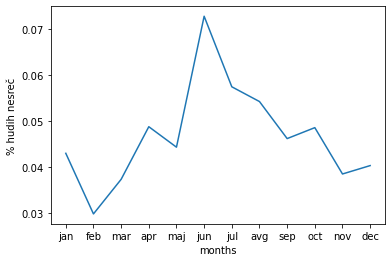

In [71]:
hude=[]
months=["jan","feb","mar","apr","maj","jun","jul","avg","sep","oct","nov","dec"]
for month in data_by_month:
    hude.append(month[((month.KlasifikacijaNesrece=='S HUDO TELESNO POŠKODBO')|(month.KlasifikacijaNesrece=='S SMRTNIM IZIDOM'))].shape[0]/month.shape[0])
plt.plot(months,hude)
plt.xlabel("months")
plt.ylabel("% hudih nesreč");


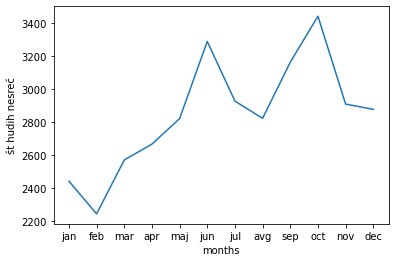

In [73]:
hude=[]
months=["jan","feb","mar","apr","maj","jun","jul","avg","sep","oct","nov","dec"]
for month in data_by_month:
    hude.append(month.shape[0])
plt.plot(months,hude)
plt.xlabel("months")
plt.ylabel("št nesreč");


In [ ]:
hude=[]
months=["jan","feb","mar","apr","maj","jun","jul","avg","sep","oct","nov","dec"]
for month in data_by_month:
    hude.append(month[((month.KlasifikacijaNesrece=='S HUDO TELESNO POŠKODBO')|(month.KlasifikacijaNesrece=='S SMRTNIM IZIDOM'))].shape[0]/month.shape[0])
plt.plot(months,hude)
plt.xlabel("months")
plt.ylabel("% hudih nesreč");